# Analysis of Starting & Ending Trip Events

### Import data, make Date_Time into a datetime object

In [172]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime
df = pd.read_csv('../data/mbike_NamedStations_StartEndOnly.csv', index_col=0)

print(str(len(df.index)) + " Starting/Ending trip bike events.")
print(str(len(df.Coords_Latitude.unique())) + " unique Latitude Coordinates.")
print(str(len(df.Coords_Longitude.unique())) + " unique Longitude Coordinates.")


156602 Starting/Ending trip bike events.
24 unique Latitude Coordinates.
24 unique Longitude Coordinates.


## We will convert the current data_time to a python datetime object, then get the day of the week this corresponds to. 

In [153]:
def fixDateTime(row):
    s = row['Date_Time'].split("T")
    t = s[1].split(".")[0]
    date = s[0]
    datetime = date +" " + t
    #print(date)
    return pd.Series([datetime])

df[['Date_Time']] = df.apply(fixDateTime, axis=1)
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')
df['Day'] = pd.to_datetime(df['Date_Time']).dt.dayofweek
df.head(1)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2


In [171]:
len(df.index)

113964

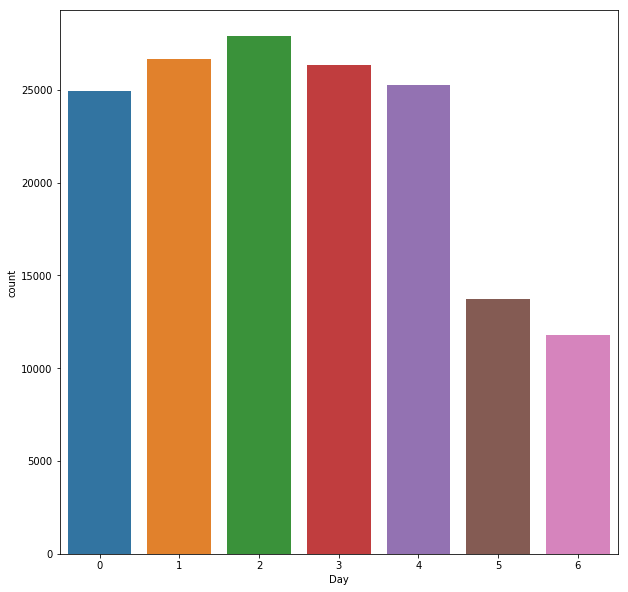

In [154]:
sns.countplot(x="Day", data= df)

__*Distribution of usage by day. 0 corresponds to Monday, 6 corresponds to Sunday.*__

(0, 400)

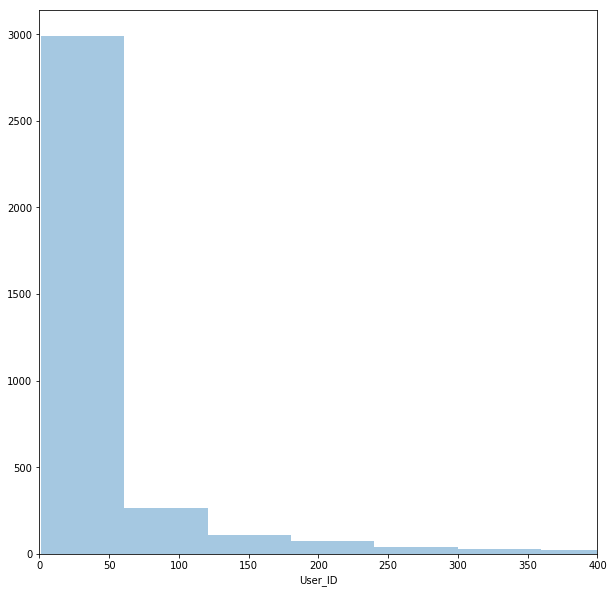

In [155]:
sns.distplot(df['User_ID'].value_counts()[:], norm_hist=False, kde=False)
plt.xlim(0,400)

In [156]:
df.head(5).Date_Time.dt.dayofweek

0    2
1    3
2    3
3    5
4    5
Name: Date_Time, dtype: int64

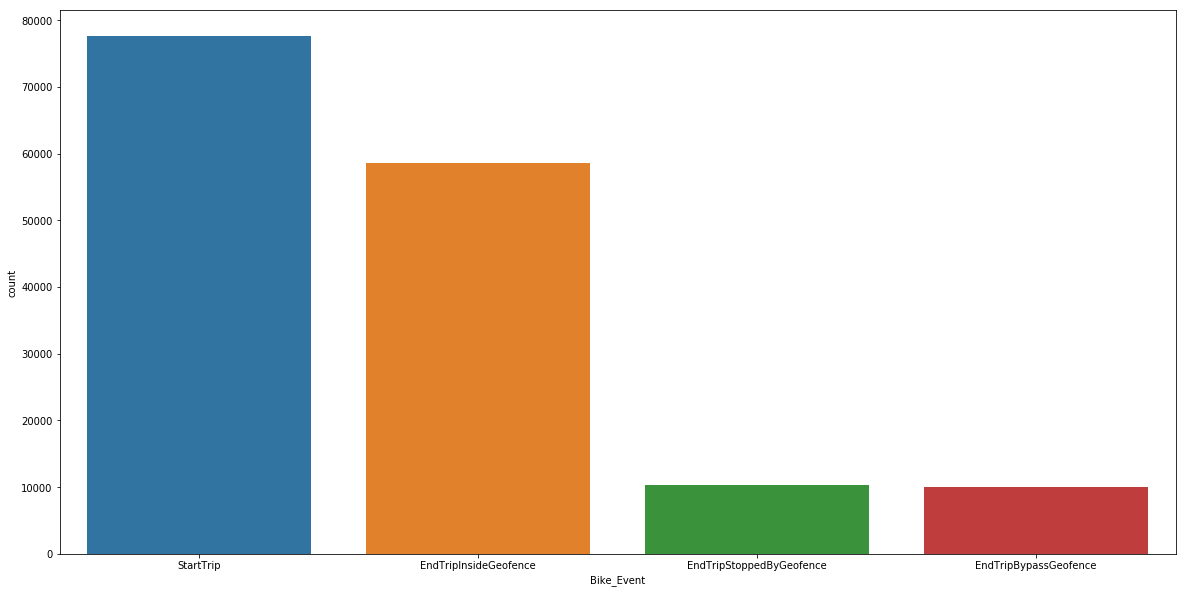

In [157]:
plt.rcParams['figure.figsize'] = [20, 10]
sns.countplot(df.Bike_Event)

In [158]:
df.Bike_Event.value_counts()

StartTrip                   77600
EndTripInsideGeofence       58665
EndTripStoppedByGeofence    10357
EndTripBypassGeofence        9980
Name: Bike_Event, dtype: int64

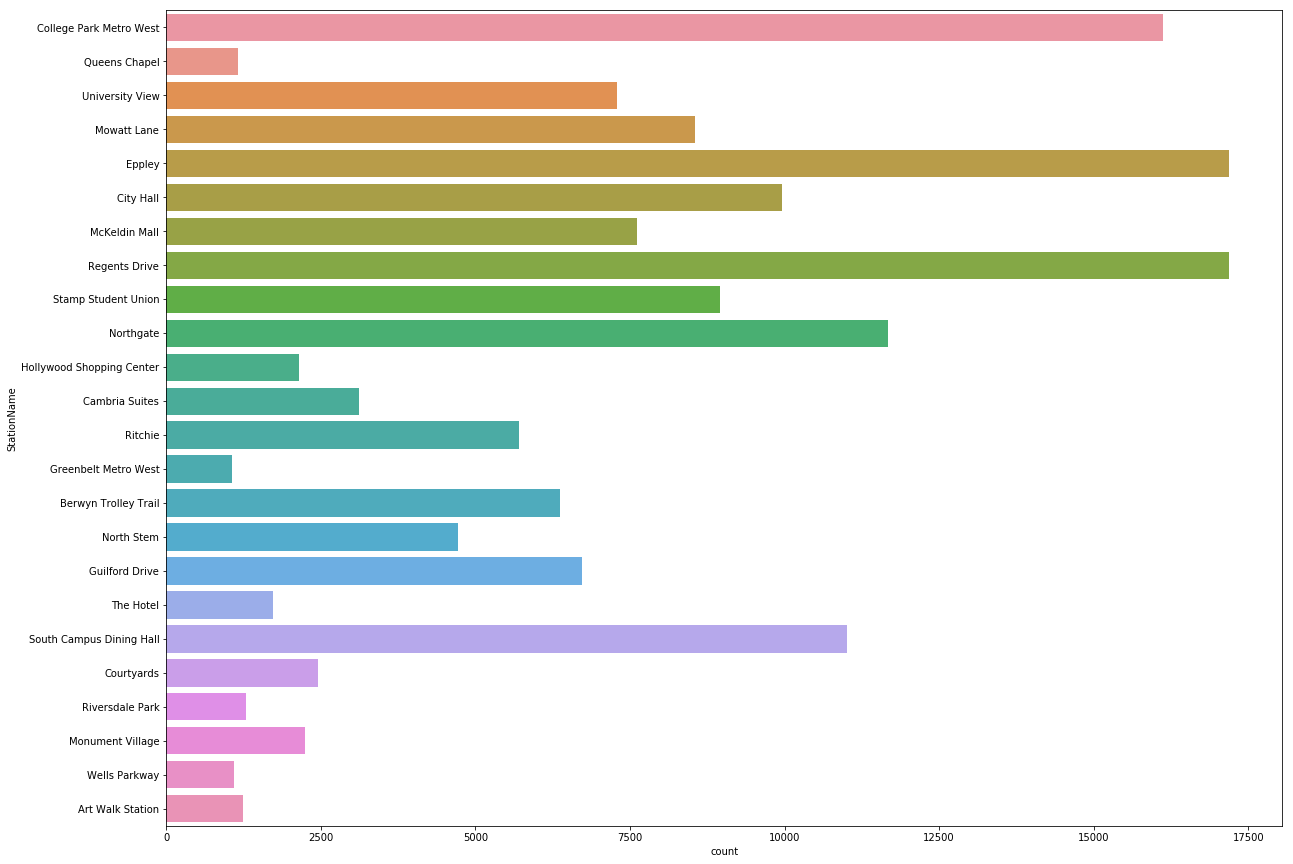

In [159]:
plt.rcParams['figure.figsize'] = [20, 15]
ax = sns.countplot(y="StationName", data=df)

In [160]:
dfStation = pd.read_csv('../data/stationsInfo.csv')
dfStation.head(3)

,Name,Altitude,Longitude,Latitude
0,Hollywood Shopping Center,42,-76.921340,39.013710
1,Greenbelt Metro West,30,-76.913859,39.010546
2,Monument Village,40,-76.930522,39.004601


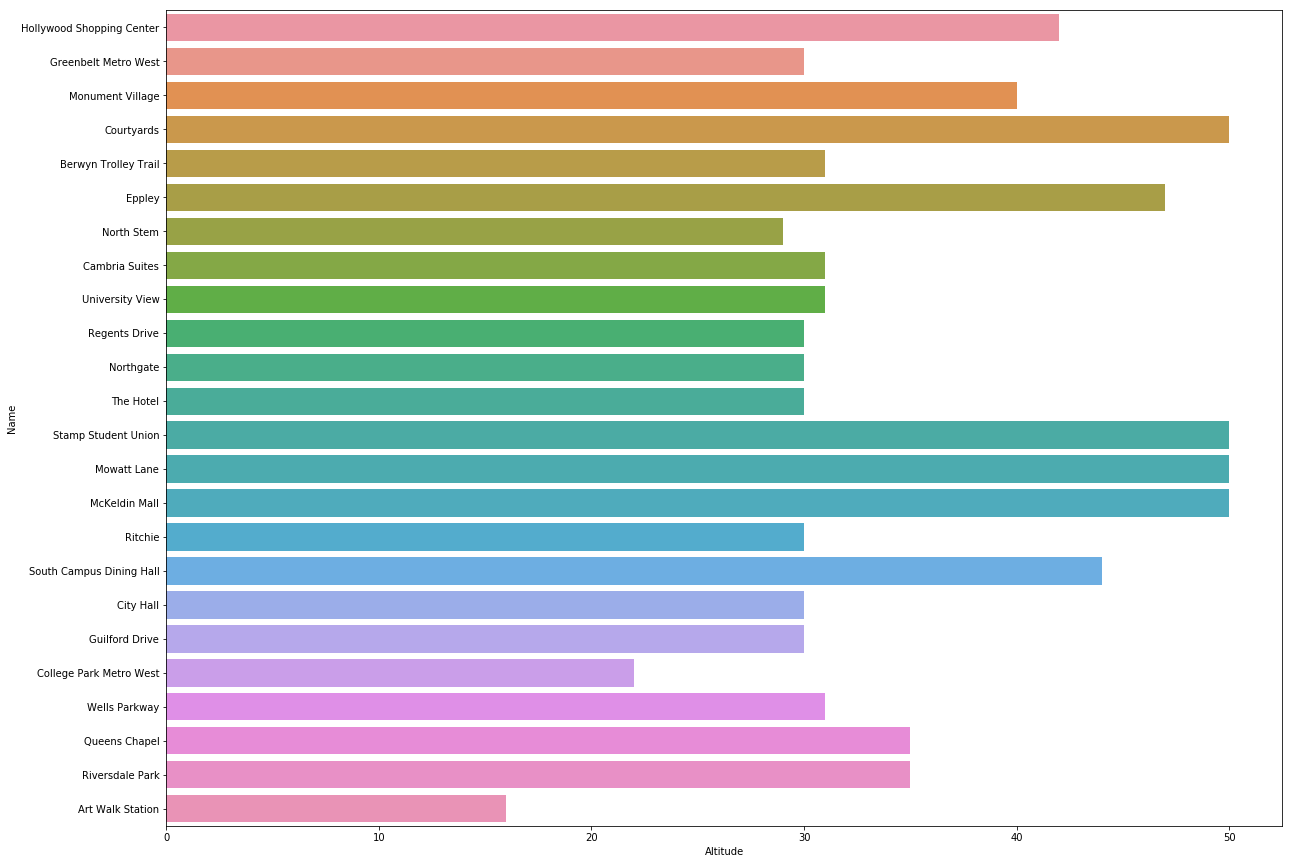

In [161]:
#sns.countplot(y="StationName")
ax = sns.barplot(y="Name", x="Altitude", data=dfStation)

In [162]:
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5


In [163]:
#Original length of start+end trip events (~156000)
df = df[df['Date_Time'] > datetime(2018,1,1)] #After 01/2018 had 23 stations!!!!
print(len(df.index)) # 104031
#print(df[df['Date_Time'] > datetime(2017,3,1)].Date_Time)

113964


In [164]:
# Split into Start/Ends
# keep only if after 03/2018 ******
dfStart = df[df["Bike_Event"] == 'StartTrip'] # 56479
dfEnd = df[df["Bike_Event"]!= 'StartTrip']  # 57485,
# So, -723 (More ends than starts). Weight for ends:
print(len(dfStart.index)/len(dfEnd.index))
print(len(dfStart.index))
print(len(dfEnd.index))

weight = len(dfStart.index)/len(dfEnd.index)
dfStart.head(2)

0.9824997825519701
56479
57485


,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
222,38.985199,-76.942699,79wA5iaNpfvyug2yW,StartTrip,26qA87mpcaQQhG37beEnELBw,2018-01-29 22:31:27,2018-01-29,22:31:27,McKeldin Mall,0
3289,38.978129,-76.929079,ejjmjSNr54JWH9max,StartTrip,292B39TcJhzNwQuDf,2018-04-24 12:01:19,2018-04-24,12:01:19,College Park Metro West,1


In [165]:
#How correlated is altitude to usage?

dfPlot = pd.DataFrame(dfStart.StationName.value_counts())#Returns a series in descending order, converts to df
dfPlot1 = pd.DataFrame(dfEnd.StationName.value_counts())
dfPlot.columns = ['StartFreq']
dfPlot1.columns = ['EndFreq']
# dfmergeSE consists of Stations and info, and the number of start/end trips.
dfmergeS = dfStation.join(dfPlot, on='Name')
dfmergeSE = dfmergeS.join(dfPlot1, on='Name')
dfmergeSE['Diff'] = dfmergeSE['StartFreq']-dfmergeSE['EndFreq']
dfmergeSE['Total'] = dfmergeSE['StartFreq']+dfmergeSE['EndFreq']

In [166]:
dfmergeSE.Diff.sum()
dfmergeSE.head(5)

,Name,Altitude,Longitude,Latitude,StartFreq,EndFreq,Diff,Total
0,Hollywood Shopping Center,42,-76.921340,39.013710,845,871,-26,1716
1,Greenbelt Metro West,30,-76.913859,39.010546,414,444,-30,858
2,Monument Village,40,-76.930522,39.004601,950,726,224,1676
3,Courtyards,50,-76.942093,39.002302,787,802,-15,1589
4,Berwyn Trolley Trail,31,-76.926618,38.994689,2171,2150,21,4321


In [167]:
dfmergeSE['Diff_Norm'] = dfmergeSE['StartFreq']-weight*dfmergeSE['EndFreq']
dfmergeSE.Diff_Norm.sum()

-3.183231456205249e-12

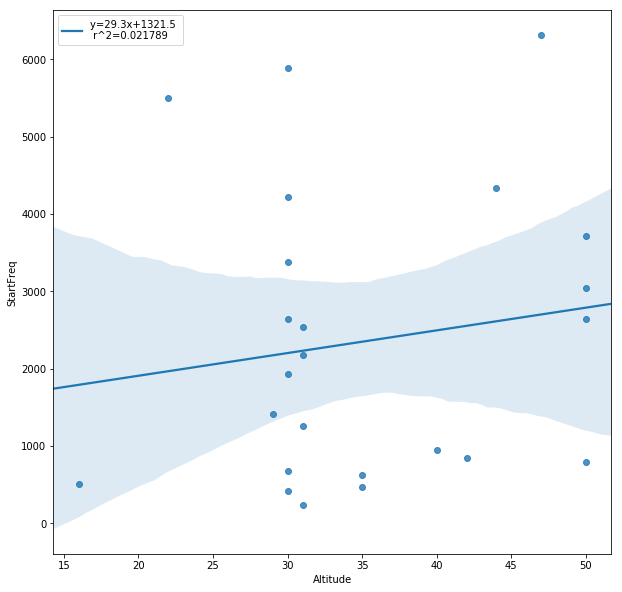

In [168]:
#sns.lmplot(x='Altitude', y='StartFreq', data=dfmergeSE)
from scipy import stats
# Use scipy.stats to get the linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE['Altitude'],dfmergeSE['StartFreq'])

# Pass parameters of fit using line_kws for legend
ax = sns.regplot(x="Altitude", y="StartFreq", data=dfmergeSE, 
 line_kws={'label':"y={0:.1f}x+{1:.1f} \n r^2={2:f}".format(slope,intercept,r_value**2)})
ax.figure.set_size_inches(10, 10)
ax.legend()
plt.show()

In [ ]:
sns.lmplot(x='Altitude', y='EndFreq', data=dfmergeSE)

In [ ]:
sns.lmplot(x='Altitude', y='Diff_Norm', data=dfmergeSE)

In [ ]:
'''from scipy import stats
# Use scipy.stats to get the linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE['Altitude'],dfmergeSE['StartTrips'])

# Pass parameters of fit using line_kws for legend
ax = sns.regplot(x="Altitude", y="Net_Norm", data=dfmergeSE, 
 line_kws={'label':"y={0:.1f}x+{1:.1f} | r={2:f}".format(slope,intercept,r_value)})
ax.legend()
plt.show()'''

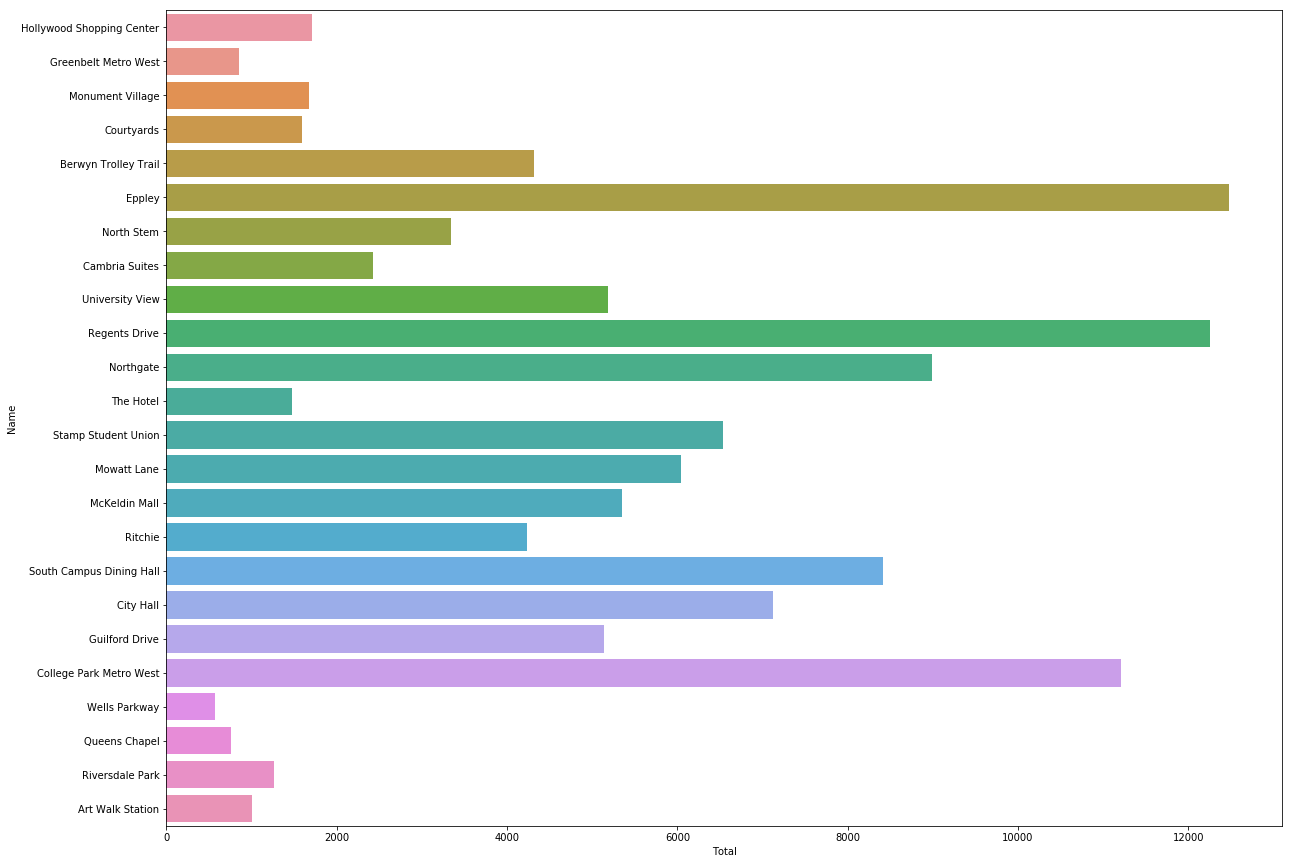

In [169]:
#ax = sns.barplot(y="Name", x="Diff_Norm", data=dfmergeSE[dfmergeSE['Diff_Norm'] < 0])
#ax = sns.barplot(y="Name", x="Diff_Norm", data=dfmergeSE)
ax = sns.barplot(y="Name", x="Total", data=dfmergeSE)


# Make maps of stations where their bubble marker represents usages. 

In [ ]:
dfmergeSE.head(5)

In [ ]:
dfmergeSE.head(5)
dfmergeSE.to_csv("stationsInfo_TripCounts.csv")

In [ ]:
#Make a map over all time of Net_Norm (StartTrips-weight*EndTrips)
import folium
m = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

# Red will mean more bikes ended than started, Blue means more started than ended
for i in range(0,len(dfmergeSE)):
    net_norm = dfmergeSE.iloc[i]['Diff_Norm']
    if (net_norm>0): 
        c ='green'
    else: 
        c = 'blue' 

    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(net_norm)*(0.15),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m)
#m
m.save('mapOfBikeODs_01_2018.html')
'''
#Make a map over all time of usage
m = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

# Red will mean more bikes ended than started, Blue means more started than ended
for i in range(0,len(dfmergeSE)):
    net_norm = dfmergeSE.iloc[i]['StartFreq'] + dfmergeSE.iloc[i]['EndFreq']
    if (net_norm>0): 
        c ='crimson'
    else: 
        c = 'blue' 

    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(net_norm)*(0.015),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m)
m
m.save('totalUsage_01-2018_map.html')
'''

AttributeError: 'JointGrid' object has no attribute 'figure'

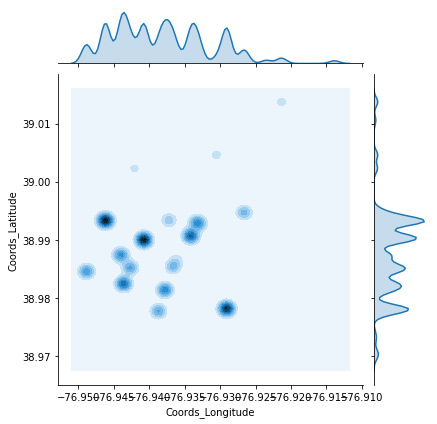

In [170]:
g = sns.jointplot("Coords_Longitude", "Coords_Latitude", kind='kde', data=df)#,joint_kws=dict(gridsize=35))
g.figure.set_size_inches(10, 10)


In [150]:
ax = sns.relplot(x="Longitude", y="Latitude", hue="Net_Norm", data=dfmergeSE);


ValueError: Could not interpret input 'Net_Norm'

# Transform data into a table of Completed Routes
(This has Trip_ID,User_ID,Start_Station,End_Station,Start_Time,End_Time, etc)

In [28]:
dfS = dfStart.set_index("Trip_ID")
dfE = dfEnd.set_index("Trip_ID")

In [29]:
dfS.head(3)
dfE.head(3)

,Coords_Latitude,Coords_Longitude,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
Trip_ID,,,,,,,,,
79wA5iaNpfvyug2yW,38.985199,-76.942699,EndTripInsideGeofence,26qA87mpcaQQhG37beEnELBw,2018-01-29 22:32:22,2018-01-29,22:32:22,McKeldin Mall,0
cvaLjh9vKtcdeQhrM,38.989979,-76.940757,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-23 13:06:02,2018-04-23,13:06:02,Regents Drive,0
qpZpMNkiJkJ4vmBpB,38.978129,-76.929079,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-25 20:51:46,2018-04-25,20:51:46,College Park Metro West,2


In [30]:
#Join on trip ID, keep coords
#Use dfStart, dfEnd. For each trip_ID, get start & end info Lat/Long and station.
dfTrips = dfS.join(dfE, lsuffix='_S', rsuffix='_E')

In [31]:
'''['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E']'''
dfTrips.columns

Index(['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E'],
      dtype='object')

In [32]:
#Remove incomplete trips!
def durInMinutes(row):
    t_E= row['Date_Time_E'] 
    t_S = row['Date_Time_S']
    dur = (t_E - t_S).seconds
    dur = round(dur/60,2)
    return pd.Series([dur])
dfTrips.head(5)
print(dfTrips)
dfCompleteTrips = dfTrips.dropna(subset=['StationName_S', 'StationName_E'])
#dfCompleteTrips['Duration'] = dfCompleteTrips['Date_Time_E'] - dfCompleteTrips['Date_Time_S']
dfCompleteTrips['Duration'] = dfCompleteTrips.apply(durInMinutes, axis=1)
# print(len(dfTrips.index)) print(len(dfCompleteTrips.index))
# duration = (after - before) // timedelta(seconds=3600)
print(str((len(dfCompleteTrips.index)/(len(dfTrips.index)))*100) + "% of trips were completed. Rest were missing start or end event.")
dfCompleteTrips.head(5)


86.48069991682327% of trips were completed. Rest were missing start or end event.


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
224m5sDwixLcZAtHY,38.989979,-76.940757,StartTrip,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:34:49,2018-03-09,12:34:49,Regents Drive,4,38.969811,-76.923467,EndTripInsideGeofence,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:48:15,2018-03-09,12:48:15,Art Walk Station,4.0,13.43
229w9YBqSsH8GLiDqB3vREit,38.984549,-76.948848,StartTrip,N2duvRsnp8qbGDE9j,2018-12-05 02:26:10,2018-12-05,02:26:10,Mowatt Lane,2,38.981365,-76.937776,EndTripInsideGeofence,N2duvRsnp8qbGDE9j,2018-12-05 02:33:47,2018-12-05,02:33:47,City Hall,2.0,7.62
22A97tQpvoZWzsjs4,38.977703,-76.938708,StartTrip,iEmvgTPzoWvqEXf2w,2018-03-09 13:06:39,2018-03-09,13:06:39,Guilford Drive,4,38.978129,-76.929079,EndTripInsideGeofence,iEmvgTPzoWvqEXf2w,2018-03-09 13:11:15,2018-03-09,13:11:15,College Park Metro West,4.0,4.60
22Ld6zu6nzqRdSTNs,38.994689,-76.926618,StartTrip,ZQbLrsCivffAR5SKo,2018-06-09 16:18:35,2018-06-09,16:18:35,Berwyn Trolley Trail,5,38.993316,-76.946189,EndTripInsideGeofence,ZQbLrsCivffAR5SKo,2018-06-09 16:28:27,2018-06-09,16:28:27,Eppley,5.0,9.87
22Yr5G8KH89rx9B5FF8TfAen,39.002302,-76.942093,StartTrip,5jfC3BBByT92N9srTYtt8ir8,2018-10-02 23:12:02,2018-10-02,23:12:02,Courtyards,1,38.982425,-76.943613,EndTripInsideGeofence,5jfC3BBByT92N9srTYtt8ir8,2018-10-02 23:32:30,2018-10-02,23:32:30,South Campus Dining Hall,1.0,20.47


## Distribution of Trip duration
- 96.5% are under 60 minutes
- 99.3% of trips are under 200 minutes

0.8624454537358625
0.992590613589812
count    56145.000000
mean        16.804632
std         61.829106
min          0.030000
25%          4.700000
50%          7.330000
75%         11.680000
max       1439.800000
Name: Duration, dtype: float64


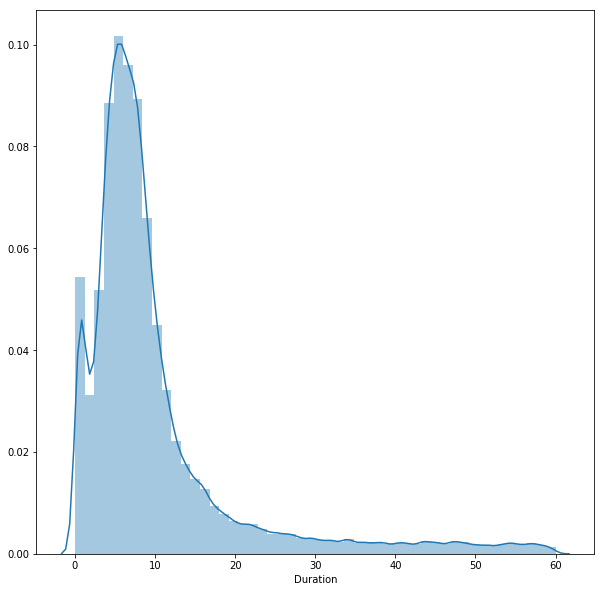

In [36]:
plt.rcParams['figure.figsize'] = [10, 10]

sns.distplot(dfCompleteTrips[dfCompleteTrips["Duration"] <= 60].Duration)
#sns.distplot(dfCompleteTrips[dfCompleteTrips.Duration)

print(len(dfCompleteTrips[dfCompleteTrips["Duration"] <= 20].index)/len(dfCompleteTrips.index))
print(len(dfCompleteTrips[dfCompleteTrips["Duration"] <= 200].index)/len(dfCompleteTrips.index))
print(dfCompleteTrips.Duration.describe())


In [42]:
dfCompleteTrips.to_csv('CompletedMBikeTrips.csv',index='False')
eppley = dfCompleteTrips[(dfCompleteTrips['StationName_S'] == 'Eppley') & (dfCompleteTrips['StationName_E'] == 'Eppley')]

In [43]:
eppley.head()

,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
27CsexfY7F3cr82nb,38.993316,-76.946189,StartTrip,G8nAk7vmo2sz6qyJa54GBDqG,2018-08-29 22:26:55,2018-08-29,22:26:55,Eppley,2,38.993316,-76.946189,EndTripInsideGeofence,G8nAk7vmo2sz6qyJa54GBDqG,2018-08-29 22:28:53,2018-08-29,22:28:53,Eppley,2.0,1.97
27Fj3vyLzynRsMtSmh3pxJHv,38.993316,-76.946189,StartTrip,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:20:30,2018-11-01,16:20:30,Eppley,3,38.993316,-76.946189,EndTripStoppedByGeofence,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:22:42,2018-11-01,16:22:42,Eppley,3.0,2.20
27Fj3vyLzynRsMtSmh3pxJHv,38.993316,-76.946189,StartTrip,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:20:30,2018-11-01,16:20:30,Eppley,3,38.993316,-76.946189,EndTripBypassGeofence,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:22:43,2018-11-01,16:22:43,Eppley,3.0,2.22
2938gM5KNN6pTojLE,38.993316,-76.946189,StartTrip,34Nn6W6qBZFL7QFwg6ECmoNq,2018-04-13 17:03:25,2018-04-13,17:03:25,Eppley,4,38.993316,-76.946189,EndTripInsideGeofence,34Nn6W6qBZFL7QFwg6ECmoNq,2018-04-13 17:06:12,2018-04-13,17:06:12,Eppley,4.0,2.78
2B6mdPX9mAdcZ4FpP6Pbg4mi,38.993316,-76.946189,StartTrip,CjF7gDyLvEnySvDdNq7nnAeN,2018-10-14 02:05:09,2018-10-14,02:05:09,Eppley,6,38.993316,-76.946189,EndTripInsideGeofence,CjF7gDyLvEnySvDdNq7nnAeN,2018-10-14 02:10:21,2018-10-14,02:10:21,Eppley,6.0,5.20


In [39]:
#Count number of times each route is taken!
count_series = dfCompleteTrips.groupby(['StationName_S', 'StationName_E']).size()
dfRoutes = count_series.to_frame(name = 'Frequency').reset_index()
dfRoutes.to_csv("routeFrequency.csv",index=False)
dfRoutes.head(2)
dfRoutes.sort_values(by=['Frequency'], ascending=False)

,StationName_S,StationName_E,Frequency
135,Eppley,Eppley,1503
364,Regents Drive,Regents Drive,1101
318,Northgate,Northgate,918
173,Guilford Drive,College Park Metro West,829
421,South Campus Dining Hall,College Park Metro West,769
89,College Park Metro West,City Hall,763
66,City Hall,College Park Metro West,759
362,Regents Drive,Northgate,757
141,Eppley,Mowatt Lane,750
94,College Park Metro West,Guilford Drive,725


In [ ]:
dfCompleteTrips.head(3)

## Weekday overall hourly bike usage (Start trips)
This data shows that bikes are rarely used for morning commutes. People are much more likely to use mBikes to commute after 12pm. This usage spikes at 9pm, and then we see that at 12am people are almost just as likely to begin a trip as at 12pm!

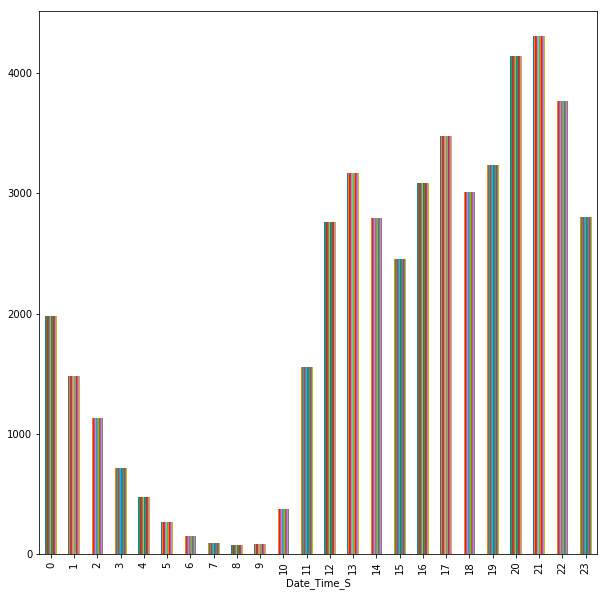

In [45]:
#Weekday plots
#dfNew =dfCompleteTrips[(dfCompleteTrips['StationName_S'] == 'City Hall') & (dfCompleteTrips['Day_S'] > 4)]
dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] >= 0) & (dfCompleteTrips['Day_S'] <= 4)]
#dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] > 5)]

dfNew.groupby([dfNew["Date_Time_S"].dt.hour]).count().plot(kind="bar",legend=False)
#dfNew.groupby([dfNew["Date_Time_S"].dt.year, dfNew["Date_Time_S"].dt.month]).count().plot(kind="bar")

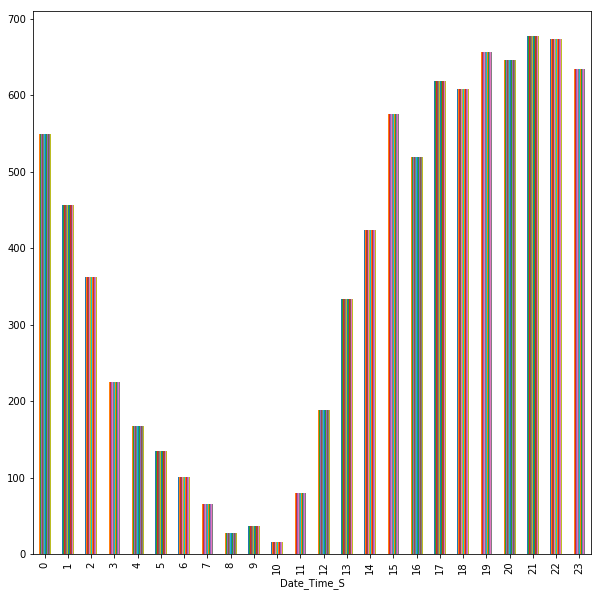

In [46]:
dfWeekend =dfCompleteTrips[(dfCompleteTrips['Day_S'] >4) & (dfCompleteTrips['Day_S'] <= 6)]
#dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] > 5)]

dfWeekend.groupby([dfWeekend["Date_Time_S"].dt.hour]).count().plot(kind="bar",legend=False)

### Table showing average weekday bike differential by station
Station: Morning bike diff | Midday Bike diff | Evening Bike diff | Late Bike diff

In [ ]:
df.head(2)

In [127]:
# Split into Start/Ends
# keep only if after 01/2018 ******

dfWeekdays = df[(df["Day"] <=4) & (df["Day"]>=0)]
print(dfWeekdays['Date_Time'].max())
print(dfWeekdays['Date_Time'].min())

#Split into 4 dataframes, corresponding to morning, mid-day, evening and Late:
dfWeekdaysM = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 4) & (dfWeekdays['Date_Time'].dt.hour < 10)]
dfWeekdaysMid = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 10) & (dfWeekdays['Date_Time'].dt.hour < 16)]
dfWeekdaysEve = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 16) & (dfWeekdays['Date_Time'].dt.hour < 22)]
dfWeekdaysLate = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 22) | (dfWeekdays['Date_Time'].dt.hour < 4) ]


######################################################[###
#print(len(dfWeekdays[dfWeekdays['Bike_Event'] =='StartTrip'].index))
#print(len(dfWeekdays[dfWeekdays['Bike_Event'] !='StartTrip'].index))

'''
#dfStartWd1 = dfStartWd.apply(getSection1, axis=1)
dfStartWdM = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 4) & (dfStartWd['Date_Time'].dt.hour < 10)]
dfStartWdMid = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 10) & (dfStartWd['Date_Time'].dt.hour < 16)]
dfStartWdEve = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 16) & (dfStartWd['Date_Time'].dt.hour < 22)]
dfStartWdLate = dfStartWd[(dfStartWd['Date_Time'].dt.hour >= 22) | (dfStartWd['Date_Time'].dt.hour < 4) ]
'''

#Section into time slots of 4-10am,10am-4pm, 4-10pm, 10pm-4am
#dfStartWd1 = dfStartWd[(dfStartWd['Date_Time'].hour <= 10) & (dfStartWd['Date_Time'].hour >= 4)]
#print(len(dfStartWd1.index))
def getUsage(dfByTime, periodString):
    a = dfByTime[dfByTime["Bike_Event"] == 'StartTrip'].StationName.value_counts()
    b = dfByTime[dfByTime["Bike_Event"] != 'StartTrip'].StationName.value_counts()*weight
    dfComb = pd.DataFrame(b-a)
    periodString = periodString + ' Usage'
    dfComb.columns = [periodString] # Negative means more end trips
    dfComb[periodString] = dfComb[periodString].fillna(0).astype('int64')
    return dfComb

dfCombM = getUsage(dfWeekdaysM, 'Morning')
dfCombMid = getUsage(dfWeekdaysMid, 'Mid-day')
dfCombEve = getUsage(dfWeekdaysEve, 'Evening')
dfCombLate = getUsage(dfWeekdaysLate, 'Late')

dfCombM.head(2)
dfCombMid.head(2)
dfCombEve.head(2)
dfCombLate.head(2)

#dfWeekdaysM_Comb = pd.DataFrame([]
#dfWeekdaysMid[dfWeekdaysMid["Bike_Event"] != 'StartTrip'].StationName.value_counts()
#dfWeekdaysMid[dfWeekdaysMid["Bike_Event"] == 'StartTrip'].StationName.value_counts()

#dfWeekdaysEve[dfWeekdaysEve["Bike_Event"] != 'StartTrip'].StationName.value_counts()
#dfWeekdaysEve[dfWeekdaysEve["Bike_Event"] == 'StartTrip'].StationName.value_counts()

#dfWeekdaysLate[dfWeekdaysLate["Bike_Event"] != 'StartTrip'].StationName.value_counts()
#dfWeekdaysLate[dfWeekdaysLate["Bike_Event"] == 'StartTrip'].StationName.value_counts()

2019-01-14 23:45:51
2018-01-01 00:53:31


,Late Usage
Art Walk Station,7
Berwyn Trolley Trail,475


In [57]:
dfCombM.Date_Time.min()

AttributeError: 'DataFrame' object has no attribute 'Date_Time'

In [128]:
# We are surveying 54 weeks(Monday-monday)
# 54*5 + 1 = 271 weekdays
dfBigCat = pd.concat([dfCombM, dfCombMid, dfCombEve, dfCombLate], axis=1, join='outer')





dfCatPerWeekday = dfBigCat.div(271).round(1)

dfBigCat.head(24)
dfCatPerWeekday.head(24)


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Morning Usage,Mid-day Usage,Evening Usage,Late Usage
Art Walk Station,NaN,0.9,-1.0,0.0
Berwyn Trolley Trail,0.0,-2.9,0.9,1.8
Cambria Suites,0.0,-0.6,0.0,0.3
City Hall,-0.1,-0.9,1.0,0.8
College Park Metro West,0.1,2.4,-1.5,-0.7
Courtyards,0.0,-0.5,0.4,0.2
Eppley,0.2,-0.7,0.6,-0.7
Greenbelt Metro West,-0.0,0.3,-0.1,-0.1
Guilford Drive,0.1,-2.9,0.9,1.5
Hollywood Shopping Center,0.1,-1.3,0.7,0.5


### Average Bike gain/loss by station per day, as well as in each section of the day

In [129]:
import numpy as np

dfCatPerWeekday['Bike_Difference'] = dfCatPerWeekday.sum(axis = 1, skipna = True).round(2)
dfCatPerWeekday.head(24)

dfCatWdOrg = dfCatPerWeekday.iloc[(-np.abs(dfCatPerWeekday['Bike_Difference'].values)).argsort()]
dfCatWdOrg.head(10)


,Morning Usage,Mid-day Usage,Evening Usage,Late Usage,Bike_Difference
Stamp Student Union,-0.1,0.6,-2.7,-1.0,-3.2
Northgate,0.1,0.8,1.2,-0.2,1.9
North Stem,-0.1,1.0,0.9,0.0,1.8
Regents Drive,0.1,4.1,-0.6,-2.0,1.6
South Campus Dining Hall,-0.0,-1.1,-0.6,0.5,-1.2
Ritchie,0.1,0.1,0.7,0.2,1.1
Monument Village,0.0,-1.2,-0.1,0.5,-0.8
City Hall,-0.1,-0.9,1.0,0.8,0.8
Eppley,0.2,-0.7,0.6,-0.7,-0.6
University View,-0.0,-0.9,0.6,0.8,0.5


In [130]:
dfCatWdOrg.head(24)
dfCatWdOrg.Bike_Difference.sum()

1.3999999999999997

### What about during the busiest times?
We'll look at week of Sept 3- Sept 9th 2018. 2282 Trips (started) in that week alone!

In [142]:
dfBusy = df[(df['Date_Time'] < datetime(2018,9,10)) & (df['Date_Time'] >= datetime(2018,10,))] #After 01/2018 had 23 stations!!!!
print(len(dfBusy[dfBusy['Bike_Event'] == 'StartTrip'].index))

2241


In [149]:
#dfBusy = df[(df['Date_Time'] < datetime(2018,9,10)) & (df['Date_Time'] >= datetime(2018,9,3))] #After 01/2018 had 23 stations!!!!

dfBusy = df[(df['Date_Time'] < datetime(2018,9,3)) & (df['Date_Time'] >= datetime(2018,8,27))] #After 01/2018 had 23 stations!!!!
#dfBusy = df[(df['Date_Time'] < datetime(2018,10,8)) & (df['Date_Time'] >= datetime(2018,10,1))] #After 01/2018 had 23 stations!!!!

dfWeekdaysB = dfBusy[(dfBusy["Day"] <=4) & (dfBusy["Day"]>=0)]
print(dfWeekdaysB['Date_Time'].max())
print(dfWeekdaysB['Date_Time'].min())

#Split into 4 dataframes, corresponding to morning, mid-day, evening and Late:
dfWeekdaysMB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 4) & (dfWeekdaysB['Date_Time'].dt.hour < 10)]
dfWeekdaysMidB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 10) & (dfWeekdaysB['Date_Time'].dt.hour < 16)]
dfWeekdaysEveB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 16) & (dfWeekdaysB['Date_Time'].dt.hour < 22)]
dfWeekdaysLateB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 22) | (dfWeekdaysB['Date_Time'].dt.hour < 4) ]

dfCombMB = getUsage(dfWeekdaysMB, 'Morning')
dfCombMidB = getUsage(dfWeekdaysMidB, 'Mid-day')
dfCombEveB = getUsage(dfWeekdaysEveB, 'Evening')
dfCombLateB = getUsage(dfWeekdaysLateB, 'Late')

dfBigCatB = pd.concat([dfCombMB, dfCombMidB, dfCombEveB, dfCombLateB], axis=1, join='outer')





dfCatPerWeekdayB = dfBigCatB.div(5).round(1)
dfCatPerWeekdayB['Bike_Difference'] = dfCatPerWeekdayB.sum(axis = 1, skipna = True).round(2)
dfCatWdBOrg = dfCatPerWeekdayB.iloc[(-np.abs(dfCatPerWeekdayB['Bike_Difference'].values)).argsort()]

dfCatWdBOrg.head(10)



#print(dfCatPerWeekdayB.Bike_Difference.sum())

2018-08-31 23:54:00
2018-08-27 00:01:24


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Morning Usage,Mid-day Usage,Evening Usage,Late Usage,Bike_Difference
Eppley,0.4,0.6,9.4,-1.8,8.6
Northgate,0.0,0.6,-2.4,-3.0,-4.8
Stamp Student Union,0.0,2.8,-3.6,-3.8,-4.6
South Campus Dining Hall,0.0,0.6,-5.8,1.2,-4.0
College Park Metro West,NaN,-0.8,2.4,2.2,3.8
North Stem,NaN,-1.0,3.8,0.0,2.8
McKeldin Mall,NaN,4.0,1.8,-3.8,2.0
Ritchie,0.0,0.0,-1.2,0.0,-1.2
Berwyn Trolley Trail,NaN,-3.6,1.0,3.6,1.0
Riversdale Park,NaN,-2.6,1.2,0.4,-1.0


In [136]:
dfCatPerWeekdayB.head(10)

,Morning Usage,Mid-day Usage,Evening Usage,Late Usage,Bike_Difference
Art Walk Station,NaN,0.8,-0.2,NaN,0.6
Berwyn Trolley Trail,NaN,-3.8,0.2,3.4,-0.2
Cambria Suites,0.0,-1.0,1.0,1.8,1.8
City Hall,-0.6,-0.2,-0.2,2.0,1.0
College Park Metro West,0.0,-2.6,0.4,-0.2,-2.4
Courtyards,NaN,-0.8,0.0,0.0,-0.8
Eppley,0.4,1.2,6.0,-5.8,1.8
Greenbelt Metro West,NaN,0.4,0.0,0.0,0.4
Guilford Drive,0.0,-5.0,1.6,3.0,-0.4
Hollywood Shopping Center,NaN,-2.8,1.8,1.2,0.2


In [54]:
import numpy as np
dfCompleteTrips.head(3)

dfCatWdOrg = dfCatPerWeekday.iloc[(-np.abs(dfCatPerWeekday['Bike_Difference'].values)).argsort()]
dfCatWdOrg.head(10)

,Morning Usage,Mid-day Usage,Evening Usage,Late Usage,Bike_Difference
Stamp Student Union,-0.1,0.6,-2.7,-1.0,-3.2
Northgate,0.1,0.8,1.2,-0.2,1.9
North Stem,-0.1,1.0,0.9,0.0,1.8
Regents Drive,0.1,4.1,-0.6,-2.0,1.6
South Campus Dining Hall,-0.0,-1.1,-0.6,0.5,-1.2
Ritchie,0.1,0.1,0.7,0.2,1.1
Monument Village,0.0,-1.2,-0.1,0.5,-0.8
City Hall,-0.1,-0.9,1.0,0.8,0.8
Eppley,0.2,-0.7,0.6,-0.7,-0.6
University View,-0.0,-0.9,0.6,0.8,0.5


### What about during the busiest times?